***DATA CLEANING PROCESS***

In [ ]:
import pandas as pd
df=pd.read_csv("/content/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.duplicated()


0          False
1          False
2          False
3          False
4          False
           ...  
4087472    False
4087473    False
4087474    False
4087475    False
4087476    False
Length: 4087477, dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087477 entries, 0 to 4087476
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 343.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,4.087477e+06,4.087477e+06,4.087476e+06,4.087476e+06,4.087476e+06,4.087476e+06,4.087476e+06,4.087476e+06
mean,1.616317e+02,1.612777e+05,8.410025e+05,8.624427e+05,1.003886e+06,1.110951e+06,8.320538e-04,7.339493e-07
std,9.077627e+01,4.733764e+05,2.915176e+06,2.951704e+06,2.494532e+06,2.710484e+06,2.883334e-02,8.567082e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.700000e+01,1.247370e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.810000e+02,7.440662e+04,1.444300e+04,0.000000e+00,1.347369e+05,2.171797e+05,0.000000e+00,0.000000e+00
75%,2.340000e+02,2.071167e+05,1.094730e+05,1.474118e+05,9.362591e+05,1.108021e+06,0.000000e+00,0.000000e+00
max,3.010000e+02,9.244552e+07,3.893942e+07,3.894623e+07,2.916677e+08,3.215898e+08,1.000000e+00,1.000000e+00


In [ ]:
cat_col=[col for col in df.columns if df[col].dtype=="object"]
print(cat_col)
num_col=[col for col in df.columns if df[col].dtype!="object"]
print(num_col)

['type', 'nameOrig', 'nameDest']
['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [ ]:
df[cat_col].nunique()

type              5
nameOrig    4083581
nameDest    1746917
dtype: int64

In [ ]:
df1=df

In [ ]:
round(df1.isnull().values.any().sum()/df.shape[0]*100,2)

0.0

<Axes: xlabel='type', ylabel='count'>

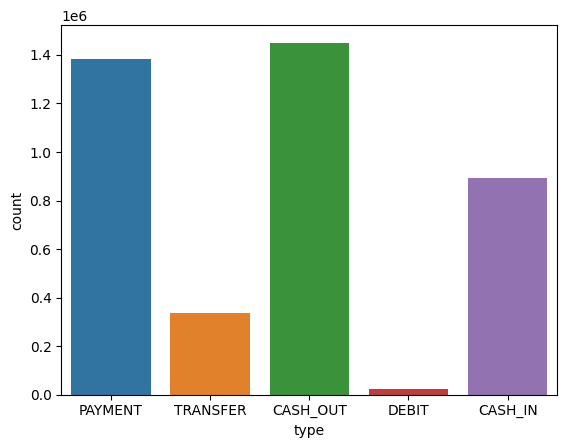

In [ ]:
import seaborn as sns
sns.countplot(x="type",data=df1)



<Axes: xlabel='type', ylabel='amount'>

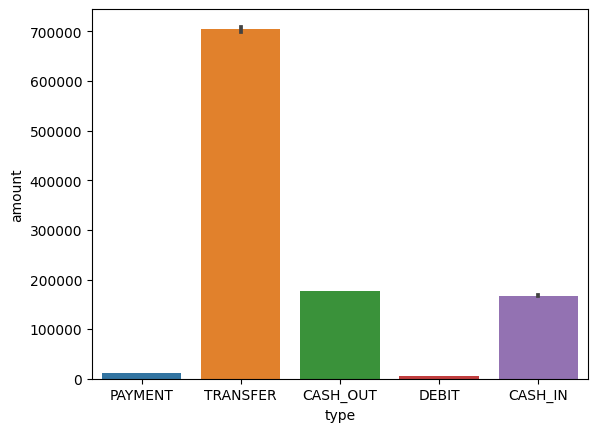

In [ ]:
sns.barplot(x="type",y='amount',data=df1)

In [ ]:
df1['isFraud'].value_counts()

0.0    4084075
1.0       3401
Name: isFraud, dtype: int64

<ipython-input-20-a644fae64414>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['step'],bins=100)


<Axes: xlabel='step', ylabel='Density'>

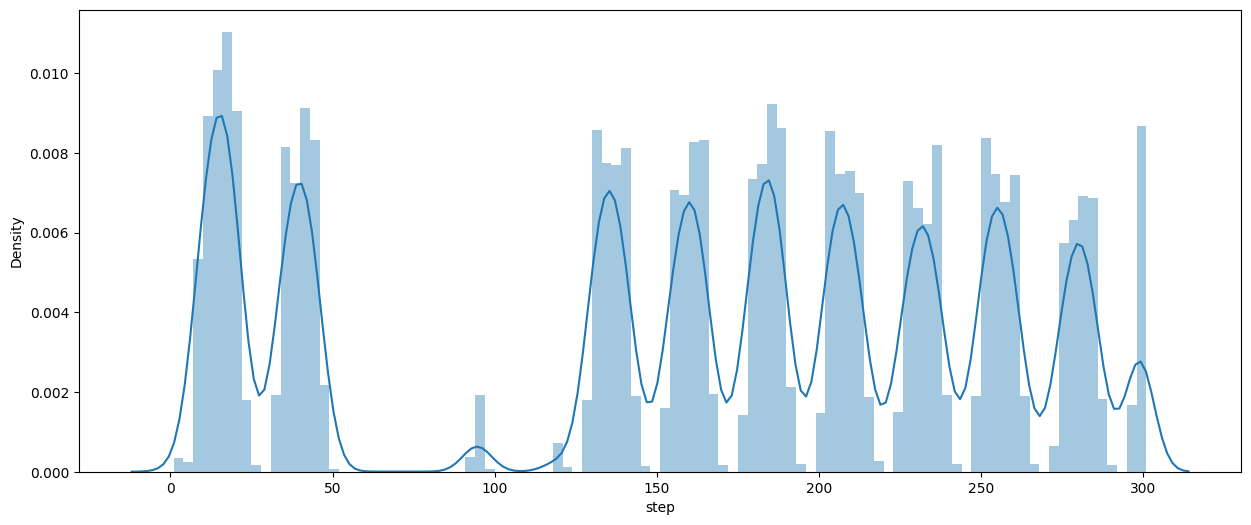

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.distplot(df1['step'],bins=100)


In [ ]:
type_new=pd.get_dummies(df1['type'],drop_first=True)
data_new=pd.concat([df1,type_new],axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,0,0,1,0


In [ ]:
data_new=data_new.fillna(0)

In [ ]:
x=data_new.drop(['isFraud','type','nameOrig','nameDest'],axis=1)
y=data_new["isFraud"]

In [ ]:
x.shape,y.shape

((4087477, 11), (4087477,))

**DATA SPLITTING***

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

print(x_train)
print(y_train)

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


         step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
3161358   237   10819.82      127333.00       116513.18            0.00   
3823675   282   66866.89       10584.00            0.00        10786.19   
3262759   251  488741.94      405024.50            0.00      3326077.83   
2891573   228   22845.86       27479.24         4633.38            0.00   
746358     38   11160.03       59714.00        48553.97            0.00   
...       ...        ...            ...             ...             ...   
2356330   190   71679.68     7712435.95      7784115.63     10339334.52   
3511566   259  198535.06    10319143.74     10517678.80       367300.49   
2229084   186   58815.82           0.00            0.00        72716.76   
2768307   213   10697.19        1863.00            0.00            0.00   
2219110   186  206355.32        6219.00            0.00       350851.07   

         newbalanceDest  isFlaggedFraud  CASH_OUT  DEBIT  PAYMENT  TRANSFER  
3161358            0.

***MODEL DEVELOPMEN***T

In [ ]:
models=[LogisticRegression(),XGBClassifier()]
for i in range(len(models)):
  models[i].fit(x_train,y_train)
  print(f'{models[i]}: ')
  train_pred=models[i].predict_proba(x_train)[:,1]
  print("Training acccuracy : ",ras(y_train,train_pred))

  y_pred=models[i].predict_proba(x_test)[:,1]
  print('Validation Accuracy : ',ras(y_test,y_pred))
  print()

LogisticRegression(): 
Training acccuracy :  0.937864577694931
Validation Accuracy :  0.9270651664046723

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...): 
Training acccuracy :  0.9999608658986505
Validation Accuracy :  0.9984794411408134

